# <center> EMI Music Data Science Hackathon 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 20, 5

In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
from sklearn.ensemble import RandomForestRegressor

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.metrics import accuracy_score 

## Cмотрим на данные

### 1) Train

In [30]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,Artist,Track,User,Rating,Time
0,40,179,47994,9,17
1,9,23,8575,58,7
2,46,168,45475,13,16
3,11,153,39508,42,15
4,14,32,11565,54,19


In [114]:
train.shape

(188690, 5)

In [115]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188690 entries, 0 to 188689
Data columns (total 5 columns):
Artist    188690 non-null int64
Track     188690 non-null int64
User      188690 non-null int64
Rating    188690 non-null int64
Time      188690 non-null int64
dtypes: int64(5)
memory usage: 7.2 MB


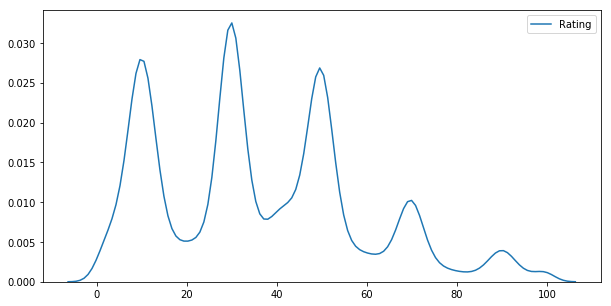

In [95]:
sns.kdeplot(train.Rating); #распределение рейтинга

In [96]:
train.Rating.min()

0

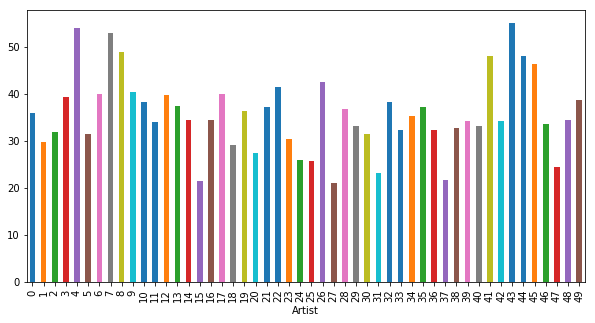

In [97]:
train.groupby('Artist')['Rating'].mean().plot(kind='bar'); # средний рейтинг по исполнителям

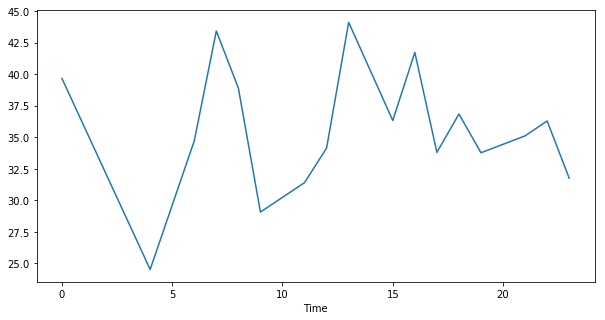

In [98]:
train.groupby('Time')['Rating'].mean().plot(); # средний рейтинг в зависимости от времени

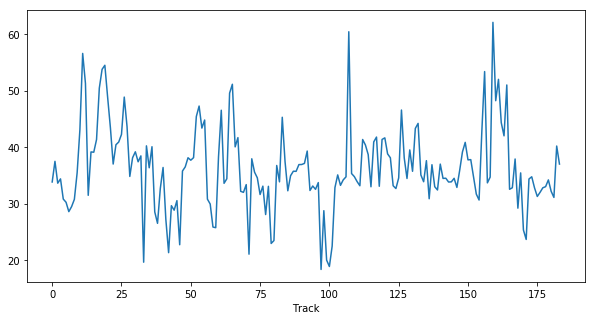

In [99]:
train.groupby('Track')['Rating'].mean().plot(); # средний рейтинг в зависимости от трека

In [116]:
train.isnull().any() # проверка на пустые значения

Artist    False
Track     False
User      False
Rating    False
Time      False
dtype: bool

In [6]:
train=train.reset_index(drop=True)# сброс индекса

In [7]:
train= train.sort_values(by=['Artist', 'Track'])

In [8]:
train.tail()

,Artist,Track,User,Rating,Time
188685,49,183,47447,30,17
188686,49,183,50830,56,17
188687,49,183,50097,50,17
188688,49,183,50628,29,17
188689,49,183,50556,69,17


In [156]:
len(train.User.unique())

49479

- Простая модель

### 2) Words

In [7]:
words = pd.read_csv('words.csv', encoding='ISO-8859-1')

In [10]:
words.head()

,Artist,User,HEARD_OF,OWN_ARTIST_MUSIC,LIKE_ARTIST,Uninspired,Sophisticated,Aggressive,Edgy,Sociable,...,Unoriginal,Dated,Iconic,Unapproachable,Classic,Playful,Arrogant,Warm,Soulful,Unnamed: 87
0,47,45969,Heard of,NaN,NaN,NaN,0.0,NaN,0,0.0,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN
1,35,29118,Never heard of,NaN,NaN,0.0,NaN,0.0,0,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN
2,14,31544,Heard of,NaN,NaN,0.0,NaN,0.0,0,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN
3,23,18085,Never heard of,NaN,NaN,NaN,NaN,0.0,0,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN
4,23,18084,Never heard of,NaN,NaN,NaN,NaN,0.0,0,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN


In [129]:
words.shape

(118301, 88)

In [130]:
words.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118301 entries, 0 to 118300
Data columns (total 88 columns):
Artist              118301 non-null int64
User                118301 non-null int64
HEARD_OF            118277 non-null object
OWN_ARTIST_MUSIC    33507 non-null object
LIKE_ARTIST         33308 non-null float64
Uninspired          26154 non-null float64
Sophisticated       20724 non-null float64
Aggressive          97577 non-null float64
Edgy                118301 non-null int64
Sociable            20724 non-null float64
Laid back           20724 non-null float64
Wholesome           1040 non-null float64
Uplifting           20724 non-null float64
Intriguing          20724 non-null float64
Legendary           1040 non-null float64
Free                20724 non-null float64
Thoughtful          118301 non-null int64
Outspoken           20724 non-null float64
Serious             97577 non-null float64
Good lyrics         97577 non-null float64
Unattractive        97577 non-null f

In [11]:
words.isnull().any() # проверяем NaN

Artist              False
User                False
HEARD_OF             True
OWN_ARTIST_MUSIC     True
LIKE_ARTIST          True
Uninspired           True
Sophisticated        True
Aggressive           True
Edgy                False
Sociable             True
Laid back            True
Wholesome            True
Uplifting            True
Intriguing           True
Legendary            True
Free                 True
Thoughtful          False
Outspoken            True
Serious              True
Good lyrics          True
Unattractive         True
Confident            True
Old                  True
Youthful             True
Boring               True
Current             False
Colourful            True
Stylish             False
Cheap                True
Irrelevant           True
                    ...  
Genius               True
Trendsetter         False
Noisy                True
Upbeat               True
Relatable            True
Energetic           False
Exciting             True
Emotional   

In [12]:
words = words.fillna(-999)

In [13]:
words.head()

,Artist,User,HEARD_OF,OWN_ARTIST_MUSIC,LIKE_ARTIST,Uninspired,Sophisticated,Aggressive,Edgy,Sociable,...,Unoriginal,Dated,Iconic,Unapproachable,Classic,Playful,Arrogant,Warm,Soulful,Unnamed: 87
0,47,45969,Heard of,-999,-999.0,-999.0,0.0,-999.0,0,0.0,...,-999.0,0.0,-999.0,-999.0,0.0,-999.0,-999.0,0,0.0,-999.0
1,35,29118,Never heard of,-999,-999.0,0.0,-999.0,0.0,0,-999.0,...,0.0,0.0,-999.0,0.0,0.0,0.0,0.0,0,-999.0,-999.0
2,14,31544,Heard of,-999,-999.0,0.0,-999.0,0.0,0,-999.0,...,0.0,0.0,-999.0,0.0,0.0,0.0,0.0,0,-999.0,-999.0
3,23,18085,Never heard of,-999,-999.0,-999.0,-999.0,0.0,0,-999.0,...,0.0,0.0,-999.0,0.0,0.0,0.0,0.0,0,-999.0,-999.0
4,23,18084,Never heard of,-999,-999.0,-999.0,-999.0,0.0,0,-999.0,...,0.0,0.0,-999.0,0.0,0.0,0.0,0.0,0,-999.0,-999.0


In [14]:
words['HEARD_OF'].value_counts()

Never heard of                             61892
Heard of                                   22878
Heard of and listened to music EVER        19914
Heard of and listened to music RECENTLY    12577
Ever heard music by                          579
Listened to recently                         238
Ever heard of                                199
-999                                          24
Name: HEARD_OF, dtype: int64

In [15]:
features = ['HEARD_OF', 'OWN_ARTIST_MUSIC']
    
for feature in features:
    words[feature] = words[feature].fillna('')
    feature_dict = words[feature].value_counts().to_dict()
    words[feature] = words[feature].map(lambda x: feature_dict[x])
    
words.head()

,Artist,User,HEARD_OF,OWN_ARTIST_MUSIC,LIKE_ARTIST,Uninspired,Sophisticated,Aggressive,Edgy,Sociable,...,Unoriginal,Dated,Iconic,Unapproachable,Classic,Playful,Arrogant,Warm,Soulful,Unnamed: 87
0,47,45969,22878,84794,-999.0,-999.0,0.0,-999.0,0,0.0,...,-999.0,0.0,-999.0,-999.0,0.0,-999.0,-999.0,0,0.0,-999.0
1,35,29118,61892,84794,-999.0,0.0,-999.0,0.0,0,-999.0,...,0.0,0.0,-999.0,0.0,0.0,0.0,0.0,0,-999.0,-999.0
2,14,31544,22878,84794,-999.0,0.0,-999.0,0.0,0,-999.0,...,0.0,0.0,-999.0,0.0,0.0,0.0,0.0,0,-999.0,-999.0
3,23,18085,61892,84794,-999.0,-999.0,-999.0,0.0,0,-999.0,...,0.0,0.0,-999.0,0.0,0.0,0.0,0.0,0,-999.0,-999.0
4,23,18084,61892,84794,-999.0,-999.0,-999.0,0.0,0,-999.0,...,0.0,0.0,-999.0,0.0,0.0,0.0,0.0,0,-999.0,-999.0


In [16]:
words=words.reset_index(drop=True)

In [17]:
words['Artist'].value_counts()

2     5905
4     4625
40    4142
33    4083
12    3945
16    3918
21    3890
14    3851
10    3694
11    3504
0     3488
22    3110
3     2287
1     2284
5     2283
32    2200
31    2200
45    2186
46    2186
15    2178
20    2083
24    2075
25    2071
23    2066
17    2037
38    1942
39    1937
34    1936
36    1935
35    1931
37    1931
13    1912
6     1834
7     1822
49    1809
47    1806
48    1803
29    1802
30    1801
27    1800
28    1799
26    1795
9     1795
41    1788
42    1788
43    1787
44    1786
8      916
18     293
19     262
Name: Artist, dtype: int64

In [18]:
len(words.Artist.unique()) # Хорошо

50

In [19]:
len(words.User.unique()) # Плохо

50928

### 3) Users

In [8]:
users = pd.read_csv('users.csv')

In [21]:
users.head()

,RESPID,GENDER,AGE,WORKING,REGION,MUSIC,LIST_OWN,LIST_BACK,Q1,Q2,...,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19
0,36927,Female,60.0,Other,South,Music is important to me but not necessarily m...,1 hour,NaN,49.0,50.0,...,50.0,50.0,71.0,52.0,71.0,9.0,7.0,72.0,49.0,26.0
1,3566,Female,36.0,Full-time housewife / househusband,South,Music is important to me but not necessarily m...,1 hour,1 hour,55.0,55.0,...,12.0,65.0,65.0,80.0,79.0,51.0,31.0,68.0,54.0,33.0
2,20054,Female,52.0,Employed 30+ hours a week,Midlands,I like music but it does not feature heavily i...,1 hour,Less than an hour,11.0,50.0,...,50.0,94.0,51.0,74.0,66.0,27.0,46.0,73.0,8.0,31.0
3,41749,Female,40.0,Employed 8-29 hours per week,South,Music means a lot to me and is a passion of mine,2 hours,3 hours,81.0,80.0,...,76.0,74.0,64.0,73.0,85.0,61.0,77.0,76.0,78.0,88.0
4,23108,Female,16.0,Full-time student,North,Music means a lot to me and is a passion of mine,3 hours,6 hours,76.0,79.0,...,56.0,13.0,82.0,79.0,68.0,71.0,NaN,86.0,80.0,32.0


In [23]:
users.shape

(48645, 27)

In [158]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48645 entries, 0 to 48644
Data columns (total 27 columns):
RESPID       48645 non-null int64
GENDER       48645 non-null object
AGE          48178 non-null float64
WORKING      35520 non-null object
REGION       47605 non-null object
MUSIC        48645 non-null object
LIST_OWN     42706 non-null object
LIST_BACK    42820 non-null object
Q1           48645 non-null float64
Q2           48645 non-null float64
Q3           48645 non-null float64
Q4           48645 non-null float64
Q5           48645 non-null float64
Q6           48645 non-null float64
Q7           48645 non-null float64
Q8           48645 non-null float64
Q9           48645 non-null float64
Q10          48645 non-null float64
Q11          48645 non-null float64
Q12          48645 non-null float64
Q13          48645 non-null float64
Q14          48645 non-null float64
Q15          48645 non-null float64
Q16          42210 non-null float64
Q17          48645 non-null float64

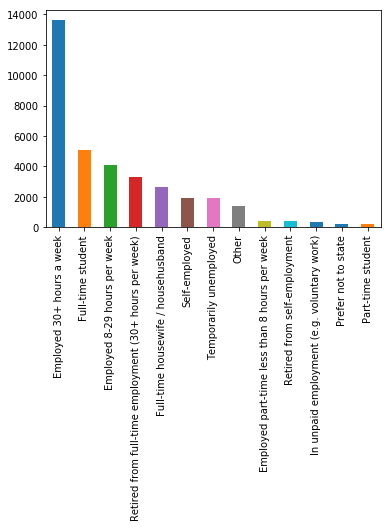

In [22]:
users['WORKING'].value_counts().plot(kind='bar');

In [24]:
users.isnull().any()

RESPID       False
GENDER       False
AGE           True
WORKING       True
REGION        True
MUSIC        False
LIST_OWN      True
LIST_BACK     True
Q1           False
Q2           False
Q3           False
Q4           False
Q5           False
Q6           False
Q7           False
Q8           False
Q9           False
Q10          False
Q11          False
Q12          False
Q13          False
Q14          False
Q15          False
Q16           True
Q17          False
Q18           True
Q19           True
dtype: bool

In [26]:
features = ['AGE', 'WORKING', 'REGION', 'LIST_OWN', 'LIST_BACK', 'Q16', 'Q18', 'Q19']

In [31]:
for feature in features:
    if feature in ['AGE', 'Q16', 'Q18', 'Q19']:
        users[feature] = users[feature].fillna(-999)
    else:
        users[feature] = users[feature].fillna('')
users.head()

,RESPID,GENDER,AGE,WORKING,REGION,MUSIC,LIST_OWN,LIST_BACK,Q1,Q2,...,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19
0,36927,Female,60.0,Other,South,Music is important to me but not necessarily m...,1 hour,,49.0,50.0,...,50.0,50.0,71.0,52.0,71.0,9.0,7.0,72.0,49.0,26.0
1,3566,Female,36.0,Full-time housewife / househusband,South,Music is important to me but not necessarily m...,1 hour,1 hour,55.0,55.0,...,12.0,65.0,65.0,80.0,79.0,51.0,31.0,68.0,54.0,33.0
2,20054,Female,52.0,Employed 30+ hours a week,Midlands,I like music but it does not feature heavily i...,1 hour,Less than an hour,11.0,50.0,...,50.0,94.0,51.0,74.0,66.0,27.0,46.0,73.0,8.0,31.0
3,41749,Female,40.0,Employed 8-29 hours per week,South,Music means a lot to me and is a passion of mine,2 hours,3 hours,81.0,80.0,...,76.0,74.0,64.0,73.0,85.0,61.0,77.0,76.0,78.0,88.0
4,23108,Female,16.0,Full-time student,North,Music means a lot to me and is a passion of mine,3 hours,6 hours,76.0,79.0,...,56.0,13.0,82.0,79.0,68.0,71.0,-999.0,86.0,80.0,32.0


In [35]:
def encode_features(df, features):
    for feature in features:
        le = LabelEncoder()
        le.fit(df[feature])
        
        df[feature] = le.transform(df[feature])
    
    return df

users = encode_features(users, ['GENDER', 'WORKING', 'REGION', 'MUSIC', 'LIST_OWN', 'LIST_BACK'])
users.head()

,RESPID,GENDER,AGE,WORKING,REGION,MUSIC,LIST_OWN,LIST_BACK,Q1,Q2,...,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19
0,36927,0,60.0,7,6,2,4,0,49.0,50.0,...,50.0,50.0,71.0,52.0,71.0,9.0,7.0,72.0,49.0,26.0
1,3566,0,36.0,4,6,2,4,4,55.0,55.0,...,12.0,65.0,65.0,80.0,79.0,51.0,31.0,68.0,54.0,33.0
2,20054,0,52.0,1,2,0,4,40,11.0,50.0,...,50.0,94.0,51.0,74.0,66.0,27.0,46.0,73.0,8.0,31.0
3,41749,0,40.0,2,6,5,23,27,81.0,80.0,...,76.0,74.0,64.0,73.0,85.0,61.0,77.0,76.0,78.0,88.0
4,23108,0,16.0,5,3,5,28,33,76.0,79.0,...,56.0,13.0,82.0,79.0,68.0,71.0,-999.0,86.0,80.0,32.0


In [45]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48645 entries, 0 to 48644
Data columns (total 27 columns):
RESPID       48645 non-null int64
GENDER       48645 non-null int64
AGE          48645 non-null float64
WORKING      48645 non-null int64
REGION       48645 non-null int64
MUSIC        48645 non-null int64
LIST_OWN     48645 non-null int64
LIST_BACK    48645 non-null int64
Q1           48645 non-null float64
Q2           48645 non-null float64
Q3           48645 non-null float64
Q4           48645 non-null float64
Q5           48645 non-null float64
Q6           48645 non-null float64
Q7           48645 non-null float64
Q8           48645 non-null float64
Q9           48645 non-null float64
Q10          48645 non-null float64
Q11          48645 non-null float64
Q12          48645 non-null float64
Q13          48645 non-null float64
Q14          48645 non-null float64
Q15          48645 non-null float64
Q16          48645 non-null float64
Q17          48645 non-null float64
Q18  

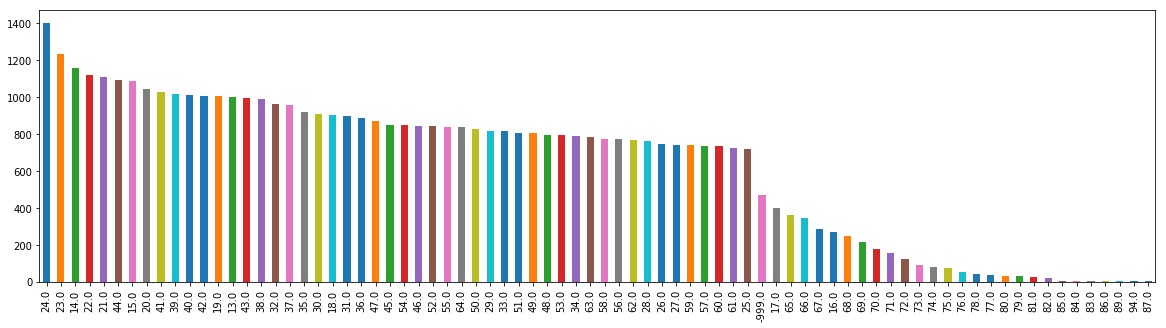

In [42]:
users['AGE'].sort_values().value_counts().plot(kind='bar');

## Слияние

In [46]:
train_merged = train.merge(words, left_on=['Artist', 'User'], right_on=['Artist', 'User'], how='left')

In [47]:
train_merged.head()

,Artist,Track,User,Rating,Time,HEARD_OF,OWN_ARTIST_MUSIC,LIKE_ARTIST,Uninspired,Sophisticated,...,Unoriginal,Dated,Iconic,Unapproachable,Classic,Playful,Arrogant,Warm,Soulful,Unnamed: 87
0,0,0,1205,57,6,22878.0,84794.0,-999.0,-999.0,0.0,...,-999.0,0.0,-999.0,-999.0,0.0,-999.0,-999.0,0.0,0.0,-999.0
1,0,0,736,7,6,61892.0,84794.0,-999.0,-999.0,0.0,...,-999.0,0.0,-999.0,-999.0,0.0,-999.0,-999.0,0.0,0.0,-999.0
2,0,0,1117,30,6,61892.0,84794.0,-999.0,-999.0,0.0,...,-999.0,0.0,-999.0,-999.0,0.0,-999.0,-999.0,0.0,1.0,-999.0
3,0,0,1148,28,6,61892.0,84794.0,-999.0,-999.0,0.0,...,-999.0,0.0,-999.0,-999.0,0.0,-999.0,-999.0,0.0,0.0,-999.0
4,0,0,1235,33,6,61892.0,84794.0,-999.0,-999.0,0.0,...,-999.0,0.0,-999.0,-999.0,0.0,-999.0,-999.0,1.0,0.0,-999.0


In [48]:
train_m = train_merged.merge(users, left_on=['User'], right_on=['RESPID'], how='left')

In [49]:
train_m.head()

,Artist,Track,User,Rating,Time,HEARD_OF,OWN_ARTIST_MUSIC,LIKE_ARTIST,Uninspired,Sophisticated,...,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19
0,0,0,1205,57,6,22878.0,84794.0,-999.0,-999.0,0.0,...,57.0,83.0,87.0,77.0,87.0,66.0,71.0,59.0,-999.0,-999.0
1,0,0,736,7,6,61892.0,84794.0,-999.0,-999.0,0.0,...,74.0,56.0,57.0,53.0,95.0,79.0,14.0,72.0,-999.0,-999.0
2,0,0,1117,30,6,61892.0,84794.0,-999.0,-999.0,0.0,...,98.0,99.0,96.0,51.0,51.0,9.0,7.0,49.0,-999.0,-999.0
3,0,0,1148,28,6,61892.0,84794.0,-999.0,-999.0,0.0,...,11.0,52.0,12.0,11.0,14.0,12.0,13.0,50.0,-999.0,-999.0
4,0,0,1235,33,6,61892.0,84794.0,-999.0,-999.0,0.0,...,33.0,83.0,56.0,23.0,21.0,43.0,16.0,46.0,-999.0,-999.0


## Моделирование

In [9]:
train.head()# количество аудитории по артисту (возраст, пол, общее кол-во)

,Artist,Track,User,Rating,Time
0,40,179,47994,9,17
1,9,23,8575,58,7
2,46,168,45475,13,16
3,11,153,39508,42,15
4,14,32,11565,54,19


In [7]:
import math

In [8]:
def rmse(x, y): return math.sqrt(((x-y)**2).mean())

In [9]:
X = train.drop('Rating', 1)
y= train.Rating

In [10]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 1234)

In [11]:
forest = RandomForestRegressor(max_depth=5)
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [12]:
y_predict = forest.predict(X_test)

In [6]:
import math

In [13]:
rmse(y_test, y_predict)

21.64209418082243

In [14]:
importances = pd.DataFrame({
    'feature': X.columns,
    'importance': np.round(forest.feature_importances_, 3)
})

importances.sort_values("importance", ascending=False)

,feature,importance
1,Track,0.515
0,Artist,0.390
3,Time,0.059
2,User,0.037


In [31]:
train2 = train.copy()

In [43]:
X_test = X_test.reset_index(drop=True)

In [46]:
np.random.shuffle(X_test.Track)

In [47]:
X_test.head()

,Artist,Track,User,Time
0,39,104,28625,23
1,3,9,5248,18
2,22,69,17737,21
3,2,144,22204,22
4,10,55,34116,12


In [33]:
train2.head()

,Artist,Track,User,Rating,Time
0,40,102,47994,9,17
1,9,167,8575,58,7
2,46,176,45475,13,16
3,11,64,39508,42,15
4,14,44,11565,54,19


In [20]:
train.columns.values

array(['Artist', 'Track', 'User', 'Rating', 'Time'], dtype=object)

In [35]:
X = train.drop('Rating', 1)
y= train.Rating
forest = RandomForestRegressor(max_depth=5)
forest.fit(X_train, y_train)
y_predict = forest.predict(X_test)
rmse(y_test, y_predict)

21.64115631600713

In [19]:
X1 = X[importances.loc[importances.importance > 0.038, 'feature']]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.5, random_state = 1234)

In [20]:
forest = RandomForestRegressor(max_depth=5)
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [80]:
y_predict = forest.predict(X_test)
rmse(y_test, y_predict)

21.64030782805487

In [82]:
importances = pd.DataFrame({
    'feature': X1.columns,
    'importance': np.round(forest.feature_importances_, 3)
})

importances.sort_values("importance", ascending=False)

,feature,importance
1,Track,0.553
0,Artist,0.386
2,Time,0.061


In [93]:
X2 = X[importances.loc[importances.importance > 0.061, 'feature']]

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.5, random_state = 1234)

In [96]:
forest = RandomForestRegressor(max_depth=5)
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [97]:
y_predict = forest.predict(X_test)
rmse(y_test, y_predict)

21.679730603881694

In [99]:
importances = pd.DataFrame({
    'feature': X2.columns,
    'importance': np.round(forest.feature_importances_, 3)
})

importances.sort_values("importance", ascending=False)

,feature,importance
1,Track,0.603
0,Artist,0.397


In [104]:
X_fin = X[['Track']]

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X_fin, y, test_size=0.5, random_state = 1234)

In [106]:
forest = RandomForestRegressor(max_depth=5)
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [107]:
y_predict = forest.predict(X_test)
rmse(y_test, y_predict)

21.609828749015232

In [109]:
importances = pd.DataFrame({
    'feature': X_fin.columns,
    'importance': np.round(forest.feature_importances_, 3)
})

importances.sort_values("importance", ascending=False)

,feature,importance
0,Track,1.0


In [ ]:
# dummy_variables

Добавить:
- User
1) Пол
2) Возраст
3) Регион
4) Наиболее очевидные оценки музыки
- Words
1) Нравится/не нравится

In [21]:
train.head()

,Artist,Track,User,Rating,Time
0,40,179,47994,9,17
1,9,23,8575,58,7
2,46,168,45475,13,16
3,11,153,39508,42,15
4,14,32,11565,54,19


In [15]:
users.head()

,RESPID,GENDER,AGE,WORKING,REGION,MUSIC,LIST_OWN,LIST_BACK,Q1,Q2,...,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19
0,36927,Female,60.0,Other,South,Music is important to me but not necessarily m...,1 hour,NaN,49.0,50.0,...,50.0,50.0,71.0,52.0,71.0,9.0,7.0,72.0,49.0,26.0
1,3566,Female,36.0,Full-time housewife / househusband,South,Music is important to me but not necessarily m...,1 hour,1 hour,55.0,55.0,...,12.0,65.0,65.0,80.0,79.0,51.0,31.0,68.0,54.0,33.0
2,20054,Female,52.0,Employed 30+ hours a week,Midlands,I like music but it does not feature heavily i...,1 hour,Less than an hour,11.0,50.0,...,50.0,94.0,51.0,74.0,66.0,27.0,46.0,73.0,8.0,31.0
3,41749,Female,40.0,Employed 8-29 hours per week,South,Music means a lot to me and is a passion of mine,2 hours,3 hours,81.0,80.0,...,76.0,74.0,64.0,73.0,85.0,61.0,77.0,76.0,78.0,88.0
4,23108,Female,16.0,Full-time student,North,Music means a lot to me and is a passion of mine,3 hours,6 hours,76.0,79.0,...,56.0,13.0,82.0,79.0,68.0,71.0,NaN,86.0,80.0,32.0


In [22]:
train['Gender'] = train.User.map(users.set_index('RESPID')['GENDER'].to_dict())

In [23]:
train.head()

,Artist,Track,User,Rating,Time,Gender
0,40,179,47994,9,17,Female
1,9,23,8575,58,7,Female
2,46,168,45475,13,16,Male
3,11,153,39508,42,15,Female
4,14,32,11565,54,19,Female


In [24]:
train = pd.get_dummies(train)

In [25]:
X = train.drop('Rating', 1)
y= train.Rating

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 1234)

In [27]:
forest = RandomForestRegressor(max_depth=5)
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [28]:
y_predict = forest.predict(X_test)

In [29]:
rmse(y_test, y_predict)

21.6399830929449

In [30]:
importances = pd.DataFrame({
    'feature': X.columns,
    'importance': np.round(forest.feature_importances_, 3)
})

importances.sort_values("importance", ascending=False)

,feature,importance
1,Track,0.511
0,Artist,0.395
3,Time,0.062
2,User,0.026
4,Gender_Female,0.004
5,Gender_Male,0.002


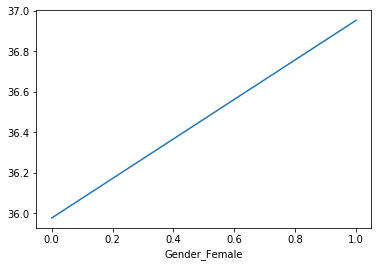

In [31]:
train.groupby('Gender_Female')['Rating'].mean().plot();

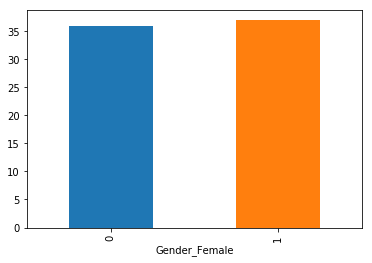

In [32]:
train.groupby('Gender_Female')['Rating'].mean().plot(kind='bar');

In [33]:
train['Age'] = train.User.map(users.set_index('RESPID')['AGE'].to_dict())

In [34]:
train['Region'] = train.User.map(users.set_index('RESPID')['REGION'].to_dict())

In [35]:
train.head()

,Artist,Track,User,Rating,Time,Gender_Female,Gender_Male,Age,Region
0,40,179,47994,9,17,1,0,41.0,North
1,9,23,8575,58,7,1,0,45.0,Centre
2,46,168,45475,13,16,0,1,23.0,Midlands
3,11,153,39508,42,15,1,0,61.0,Midlands
4,14,32,11565,54,19,1,0,20.0,South


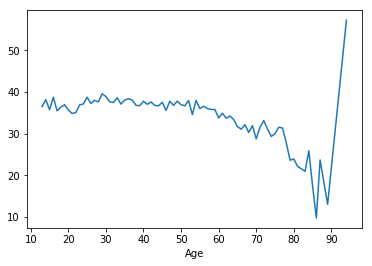

In [36]:
train.groupby('Age')['Rating'].mean().plot();

In [37]:
train['Region'].value_counts()

North               58707
South               54005
Midlands            44220
Centre               7284
Northern Ireland     2890
North Ireland         375
Name: Region, dtype: int64

In [38]:
def encode_features(df, features):
    for feature in features:
        le = LabelEncoder()
        le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

In [111]:
le = LabelEncoder()
le.fit(train['Region'])
train['Region_enc'] = le.transform(train['Region'])

TypeError: '<' not supported between instances of 'float' and 'str'

In [39]:
dct = {'North': 1, 'South': 2, 'Midlands': 3, 'Centre': 4, 'Northern Ireland': 5, 'North Ireland': 6}

In [40]:
train['Region'] = train['Region'].map(dct)

In [41]:
train.head()

,Artist,Track,User,Rating,Time,Gender_Female,Gender_Male,Age,Region
0,40,179,47994,9,17,1,0,41.0,1.0
1,9,23,8575,58,7,1,0,45.0,4.0
2,46,168,45475,13,16,0,1,23.0,3.0
3,11,153,39508,42,15,1,0,61.0,3.0
4,14,32,11565,54,19,1,0,20.0,2.0


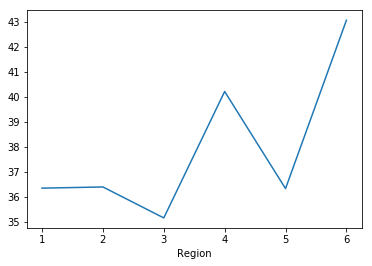

In [42]:
train.groupby('Region')['Rating'].mean().plot();

In [43]:
train.isnull().sum()

Artist               0
Track                0
User                 0
Rating               0
Time                 0
Gender_Female        0
Gender_Male          0
Age              13708
Region           21209
dtype: int64

In [44]:
train = train.fillna(train.mean())

In [45]:
train.isnull().sum()

Artist           0
Track            0
User             0
Rating           0
Time             0
Gender_Female    0
Gender_Male      0
Age              0
Region           0
dtype: int64

In [46]:
train.head()

,Artist,Track,User,Rating,Time,Gender_Female,Gender_Male,Age,Region
0,40,179,47994,9,17,1,0,41.0,1.0
1,9,23,8575,58,7,1,0,45.0,4.0
2,46,168,45475,13,16,0,1,23.0,3.0
3,11,153,39508,42,15,1,0,61.0,3.0
4,14,32,11565,54,19,1,0,20.0,2.0


In [47]:
X = train.drop('Rating', 1)
y= train.Rating

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 1234)

In [49]:
forest = RandomForestRegressor(max_depth=5)
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [50]:
y_predict = forest.predict(X_test)

In [51]:
rmse(y_test, y_predict)

21.570793841429715

In [52]:
importances = pd.DataFrame({
    'feature': X.columns,
    'importance': np.round(forest.feature_importances_, 3)
})

importances.sort_values("importance", ascending=False)

,feature,importance
1,Track,0.500
0,Artist,0.269
6,Age,0.133
3,Time,0.054
2,User,0.038
5,Gender_Male,0.003
4,Gender_Female,0.002
7,Region,0.000


In [53]:
forest.score(X_train, y_train)

0.09011341584182686

In [54]:
forest.score(X_test, y_test)

0.08995477238672478

Question - c, k, r, 

In [165]:
users.head()

,RESPID,GENDER,AGE,WORKING,REGION,MUSIC,LIST_OWN,LIST_BACK,Q1,Q2,...,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19
0,36927,Female,60.0,Other,South,Music is important to me but not necessarily m...,1 hour,NaN,49.0,50.0,...,50.0,50.0,71.0,52.0,71.0,9.0,7.0,72.0,49.0,26.0
1,3566,Female,36.0,Full-time housewife / househusband,South,Music is important to me but not necessarily m...,1 hour,1 hour,55.0,55.0,...,12.0,65.0,65.0,80.0,79.0,51.0,31.0,68.0,54.0,33.0
2,20054,Female,52.0,Employed 30+ hours a week,Midlands,I like music but it does not feature heavily i...,1 hour,Less than an hour,11.0,50.0,...,50.0,94.0,51.0,74.0,66.0,27.0,46.0,73.0,8.0,31.0
3,41749,Female,40.0,Employed 8-29 hours per week,South,Music means a lot to me and is a passion of mine,2 hours,3 hours,81.0,80.0,...,76.0,74.0,64.0,73.0,85.0,61.0,77.0,76.0,78.0,88.0
4,23108,Female,16.0,Full-time student,North,Music means a lot to me and is a passion of mine,3 hours,6 hours,76.0,79.0,...,56.0,13.0,82.0,79.0,68.0,71.0,NaN,86.0,80.0,32.0


In [55]:
train['Music'] = train.User.map(users.set_index('RESPID')['MUSIC'].to_dict())
train['c'] = train.User.map(users.set_index('RESPID')['Q3'].to_dict())
train['k'] = train.User.map(users.set_index('RESPID')['Q11'].to_dict())
train['r'] = train.User.map(users.set_index('RESPID')['Q18'].to_dict())

In [56]:
train.head()

,Artist,Track,User,Rating,Time,Gender_Female,Gender_Male,Age,Region,Music,c,k,r
0,40,179,47994,9,17,1,0,41.0,1.0,Music means a lot to me and is a passion of mine,62.0,49.0,10.0
1,9,23,8575,58,7,1,0,45.0,4.0,Music is important to me but not necessarily m...,52.0,91.0,NaN
2,46,168,45475,13,16,0,1,23.0,3.0,Music means a lot to me and is a passion of mine,90.0,72.0,73.0
3,11,153,39508,42,15,1,0,61.0,3.0,Music is important to me but not necessarily m...,55.0,71.0,50.0
4,14,32,11565,54,19,1,0,20.0,2.0,Music is important to me but not necessarily m...,28.0,84.0,37.0


In [57]:
train.Music.value_counts()

Music is important to me but not necessarily more important                                    56695
Music means a lot to me and is a passion of mine                                               54793
I like music but it does not feature heavily in my life                                        43023
Music is important to me but not necessarily more important than other hobbies or interests    12977
Music is no longer as important as it used to be to me                                          5702
Music has no particular interest for me                                                         3643
Name: Music, dtype: int64

In [58]:
train.isnull().any()

Artist           False
Track            False
User             False
Rating           False
Time             False
Gender_Female    False
Gender_Male      False
Age              False
Region           False
Music             True
c                 True
k                 True
r                 True
dtype: bool

In [59]:
train = train.fillna(0)

In [60]:
train.isnull().any()

Artist           False
Track            False
User             False
Rating           False
Time             False
Gender_Female    False
Gender_Male      False
Age              False
Region           False
Music            False
c                False
k                False
r                False
dtype: bool

In [61]:
train.loc[(train.Music == 0), "Music"] = "NotMent"

In [62]:
le = LabelEncoder()
le.fit(train['Music'])
train['Music'] = le.transform(train['Music'])

In [63]:
train.head()

,Artist,Track,User,Rating,Time,Gender_Female,Gender_Male,Age,Region,Music,c,k,r
0,40,179,47994,9,17,1,0,41.0,1.0,5,62.0,49.0,10.0
1,9,23,8575,58,7,1,0,45.0,4.0,2,52.0,91.0,0.0
2,46,168,45475,13,16,0,1,23.0,3.0,5,90.0,72.0,73.0
3,11,153,39508,42,15,1,0,61.0,3.0,2,55.0,71.0,50.0
4,14,32,11565,54,19,1,0,20.0,2.0,2,28.0,84.0,37.0


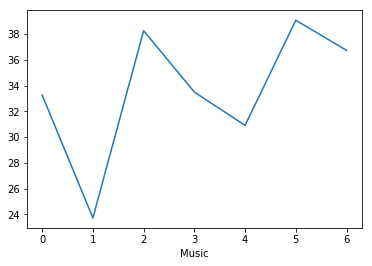

In [64]:
train.groupby('Music')['Rating'].mean().plot();

In [65]:
X = train.drop('Rating', 1)
y= train.Rating

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 1234)

In [67]:
forest = RandomForestRegressor(max_depth=5)
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [68]:
y_predict = forest.predict(X_test)

In [69]:
rmse(y_test, y_predict)

21.468313347314922

In [70]:
importances = pd.DataFrame({
    'feature': X.columns,
    'importance': np.round(forest.feature_importances_, 3)
})

importances.sort_values("importance", ascending=False)

,feature,importance
10,k,0.281
1,Track,0.271
0,Artist,0.193
2,User,0.084
9,c,0.081
3,Time,0.054
11,r,0.028
6,Age,0.006
8,Music,0.002
4,Gender_Female,0.000


- Посмотреть, какие ещё оценки исполнителей могут быть полезны?
- Попробовать XGBoost
- Посмотреть другие модели
- Добавить что-то из Words

In [71]:
train['a'] = train.User.map(users.set_index('RESPID')['Q1'].to_dict())
train['b'] = train.User.map(users.set_index('RESPID')['Q2'].to_dict())
train['d'] = train.User.map(users.set_index('RESPID')['Q4'].to_dict())
train['e'] = train.User.map(users.set_index('RESPID')['Q5'].to_dict())
train['f'] = train.User.map(users.set_index('RESPID')['Q6'].to_dict())
train['g'] = train.User.map(users.set_index('RESPID')['Q7'].to_dict())
train['h'] = train.User.map(users.set_index('RESPID')['Q8'].to_dict())
train['i'] = train.User.map(users.set_index('RESPID')['Q9'].to_dict())
train['j'] = train.User.map(users.set_index('RESPID')['Q10'].to_dict())
train['l'] = train.User.map(users.set_index('RESPID')['Q12'].to_dict())
train['m'] = train.User.map(users.set_index('RESPID')['Q13'].to_dict())
train['n'] = train.User.map(users.set_index('RESPID')['Q14'].to_dict())
train['o'] = train.User.map(users.set_index('RESPID')['Q15'].to_dict())
train['p'] = train.User.map(users.set_index('RESPID')['Q16'].to_dict())
train['q'] = train.User.map(users.set_index('RESPID')['Q17'].to_dict())
train['s'] = train.User.map(users.set_index('RESPID')['Q19'].to_dict())

In [72]:
train.head()

,Artist,Track,User,Rating,Time,Gender_Female,Gender_Male,Age,Region,Music,...,h,i,j,l,m,n,o,p,q,s
0,40,179,47994,9,17,1,0,41.0,1.0,5,...,28.0,88.0,70.0,49.0,32.0,32.0,50.0,31.0,31.0,9.0
1,9,23,8575,58,7,1,0,45.0,4.0,2,...,51.0,12.0,50.0,72.0,32.0,55.0,53.0,54.0,75.0,NaN
2,46,168,45475,13,16,0,1,23.0,3.0,5,...,29.0,29.0,71.0,48.0,100.0,100.0,28.0,65.0,72.0,83.0
3,11,153,39508,42,15,1,0,61.0,3.0,2,...,27.0,41.0,52.0,73.0,53.0,61.0,49.0,52.0,63.0,45.0
4,14,32,11565,54,19,1,0,20.0,2.0,2,...,10.0,11.0,55.0,70.0,20.0,19.0,11.0,47.0,71.0,26.0


In [73]:
train.isnull().any()

Artist           False
Track            False
User             False
Rating           False
Time             False
Gender_Female    False
Gender_Male      False
Age              False
Region           False
Music            False
c                False
k                False
r                False
a                 True
b                 True
d                 True
e                 True
f                 True
g                 True
h                 True
i                 True
j                 True
l                 True
m                 True
n                 True
o                 True
p                 True
q                 True
s                 True
dtype: bool

In [74]:
train = train.fillna(0)

In [75]:
train.isnull().any()

Artist           False
Track            False
User             False
Rating           False
Time             False
Gender_Female    False
Gender_Male      False
Age              False
Region           False
Music            False
c                False
k                False
r                False
a                False
b                False
d                False
e                False
f                False
g                False
h                False
i                False
j                False
l                False
m                False
n                False
o                False
p                False
q                False
s                False
dtype: bool

In [76]:
X = train.drop('Rating', 1)
y= train.Rating

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 1234)

In [78]:
forest = RandomForestRegressor(max_depth=5)
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [79]:
y_predict = forest.predict(X_test)

In [80]:
rmse(y_test, y_predict)

21.474363936826197

In [81]:
importances = pd.DataFrame({
    'feature': X.columns,
    'importance': np.round(forest.feature_importances_, 3)
})

importances.sort_values("importance", ascending=False)

,feature,importance
26,q,0.266
1,Track,0.218
10,k,0.160
0,Artist,0.101
2,User,0.077
25,p,0.073
3,Time,0.033
21,l,0.017
11,r,0.010
23,n,0.006


In [82]:
feats = ['i', 'd', 'g', 'e', 'f', 'j', 'Age', 'n', 's', 'm', 'h', 'c', 'b', 'Music', 'Region', 'o', 'Gender_Male', 'Gender_Female']

,Artist,Track,User,Rating,Time
0,40,179,47994,9,17
1,9,23,8575,58,7
2,46,168,45475,13,16
3,11,153,39508,42,15
4,14,32,11565,54,19


In [86]:
for f in feats:
    df_subs = train.drop(f, axis=1)
    X = df_subs.drop('Rating', 1)
    y = df_subs.Rating
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 1234)
    forest = RandomForestRegressor(n_estimators=40, max_depth=5, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
    forest.fit(X_train, y_train)
    y_predict = forest.predict(X_test)
    accur = rmse(y_test, y_predict)
    print(f, '', accur)

i  21.464022183366083
d  21.44875110862356
g  21.471357573332003
e  21.44831674804362
f  21.437686995030123
j  21.447479876882817
Age  21.452511649633692
n  21.469791527880915
s  21.463591199474305
m  21.44628100717133
h  21.46813407991142
c  21.472342106725623
b  21.47000285142151
Music  21.447238553200535
Region  21.45415859724184
o  21.43649176521283
Gender_Male  21.459983161359037
Gender_Female  21.462366606274525


In [48]:
df_subs = train.drop(['f', 'o'], 1)
X = df_subs.drop('Rating', 1)
y = df_subs.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 1234)
forest = RandomForestRegressor(n_estimators=40, max_depth=5, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
forest.fit(X_train, y_train)
y_predict = forest.predict(X_test)
accur = rmse(y_test, y_predict)
print(accur)

KeyError: "['f' 'o'] not found in axis"

In [92]:
importances = pd.DataFrame({
    'feature': X.columns,
    'importance': np.round(forest.feature_importances_, 3)
})

importances.sort_values("importance", ascending=False)

,feature,importance
24,q,0.191
1,Track,0.185
10,k,0.179
0,Artist,0.103
23,p,0.076
2,User,0.052
20,l,0.049
3,Time,0.040
22,n,0.020
12,a,0.020


In [93]:
df_subs2 = df_subs.drop(['d', 'e', 'j', 'm'], 1)
X = df_subs2.drop('Rating', 1)
y = df_subs2.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 1234)
forest = RandomForestRegressor(n_estimators=40, max_depth=5, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
forest.fit(X_train, y_train)
y_predict = forest.predict(X_test)
accur = rmse(y_test, y_predict)
print(accur)

21.43552744488935


In [94]:
importances = pd.DataFrame({
    'feature': X.columns,
    'importance': np.round(forest.feature_importances_, 3)
})

importances.sort_values("importance", ascending=False)

,feature,importance
20,q,0.200
1,Track,0.190
10,k,0.170
0,Artist,0.096
19,p,0.080
2,User,0.060
17,l,0.058
3,Time,0.041
12,a,0.020
21,s,0.020


In [98]:
df_subs3 = df_subs2.drop(['Region', 'Gender_Male', 'Gender_Female'], 1)
X = df_subs3.drop('Rating', 1)
y = df_subs3.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 1234)
forest = RandomForestRegressor(n_estimators=40, max_depth=5, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
forest.fit(X_train, y_train)
y_predict = forest.predict(X_test)
accur = rmse(y_test, y_predict)
print(accur) # плохо

21.46989844469153


In [99]:
train = df_subs2

In [107]:
train.head()

,Artist,Track,User,Rating,Time,Gender_Female,Gender_Male,Age,Region,Music,...,a,b,g,h,i,l,n,p,q,s
0,40,179,47994,9,17,1,0,41.0,1.0,5,...,62.0,22.0,48.0,28.0,88.0,49.0,32.0,31.0,31.0,9.0
1,9,23,8575,58,7,1,0,45.0,4.0,2,...,32.0,57.0,73.0,51.0,12.0,72.0,55.0,54.0,75.0,0.0
2,46,168,45475,13,16,0,1,23.0,3.0,5,...,100.0,75.0,46.0,29.0,29.0,48.0,100.0,65.0,72.0,83.0
3,11,153,39508,42,15,1,0,61.0,3.0,2,...,62.0,57.0,33.0,27.0,41.0,73.0,61.0,52.0,63.0,45.0
4,14,32,11565,54,19,1,0,20.0,2.0,2,...,22.0,69.0,9.0,10.0,11.0,70.0,19.0,47.0,71.0,26.0


## Работаем с  Words

In [100]:
words.head()

,Artist,User,HEARD_OF,OWN_ARTIST_MUSIC,LIKE_ARTIST,Uninspired,Sophisticated,Aggressive,Edgy,Sociable,...,Unoriginal,Dated,Iconic,Unapproachable,Classic,Playful,Arrogant,Warm,Soulful,Unnamed: 87
0,47,45969,Heard of,NaN,NaN,NaN,0.0,NaN,0,0.0,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN
1,35,29118,Never heard of,NaN,NaN,0.0,NaN,0.0,0,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN
2,14,31544,Heard of,NaN,NaN,0.0,NaN,0.0,0,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN
3,23,18085,Never heard of,NaN,NaN,NaN,NaN,0.0,0,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN
4,23,18084,Never heard of,NaN,NaN,NaN,NaN,0.0,0,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN


In [106]:
words.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118301 entries, 0 to 118300
Data columns (total 88 columns):
Artist              118301 non-null int64
User                118301 non-null int64
HEARD_OF            118277 non-null object
OWN_ARTIST_MUSIC    33507 non-null object
LIKE_ARTIST         33308 non-null float64
Uninspired          26154 non-null float64
Sophisticated       20724 non-null float64
Aggressive          97577 non-null float64
Edgy                118301 non-null int64
Sociable            20724 non-null float64
Laid back           20724 non-null float64
Wholesome           1040 non-null float64
Uplifting           20724 non-null float64
Intriguing          20724 non-null float64
Legendary           1040 non-null float64
Free                20724 non-null float64
Thoughtful          118301 non-null int64
Outspoken           20724 non-null float64
Serious             97577 non-null float64
Good lyrics         97577 non-null float64
Unattractive        97577 non-null f

In [110]:
words.LIKE_ARTIST.value_counts()

49.00    1639
51.00    1548
50.00    1410
30.00    1360
48.00    1208
29.00    1204
52.00    1005
31.00     951
70.00     878
28.00     825
71.00     819
32.00     743
69.00     700
68.00     666
72.00     590
46.00     573
47.00     569
53.00     565
33.00     541
54.00     531
27.00     434
67.00     429
45.00     412
55.00     370
26.00     358
74.00     328
73.00     327
9.00      322
34.00     311
10.00     293
         ... 
78.68       1
20.90       1
16.63       1
75.91       1
33.05       1
32.41       1
4.26        1
29.21       1
13.01       1
49.04       1
61.19       1
18.12       1
70.15       1
55.44       1
69.72       1
21.32       1
29.64       1
47.76       1
98.08       1
74.17       1
38.59       1
39.45       1
23.24       1
30.92       1
39.02       1
55.01       1
46.91       1
47.55       1
27.72       1
50.32       1
Name: LIKE_ARTIST, Length: 176, dtype: int64

In [113]:
train_merged = pd.merge(train, words, left_on=['Artist', 'User'], right_on=['Artist', 'User'], how='left')

In [114]:
train_merged.isnull().any()

Artist              False
Track               False
User                False
Rating              False
Time                False
Gender_Female       False
Gender_Male         False
Age                 False
Region              False
Music               False
c                   False
k                   False
r                   False
a                   False
b                   False
g                   False
h                   False
i                   False
l                   False
n                   False
p                   False
q                   False
s                   False
HEARD_OF             True
OWN_ARTIST_MUSIC     True
LIKE_ARTIST          True
Uninspired           True
Sophisticated        True
Aggressive           True
Edgy                 True
                    ...  
Genius               True
Trendsetter          True
Noisy                True
Upbeat               True
Relatable            True
Energetic            True
Exciting             True
Emotional   

In [117]:
train = train_merged.fillna(0)
train.head()

,Artist,Track,User,Rating,Time,Gender_Female,Gender_Male,Age,Region,Music,...,Unoriginal,Dated,Iconic,Unapproachable,Classic,Playful,Arrogant,Warm,Soulful,Unnamed: 87
0,40,179,47994,9,17,1,0,41.0,1.0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,23,8575,58,7,1,0,45.0,4.0,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,46,168,45475,13,16,0,1,23.0,3.0,5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,11,153,39508,42,15,1,0,61.0,3.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14,32,11565,54,19,1,0,20.0,2.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [121]:
train.loc[(train.HEARD_OF == 0), "HEARD_OF"] = "NotMent"
train.loc[(train.OWN_ARTIST_MUSIC == 0), "OWN_ARTIST_MUSIC"] = "NotMent"

In [122]:
def encode_values(dataset, array):
    for el in array:
        le = LabelEncoder()
        le.fit(dataset[el])
        dataset[el] = le.transform(dataset[el])

In [123]:
cols = ["HEARD_OF", "OWN_ARTIST_MUSIC"]
encode_values(train, cols)

In [125]:
train.isnull().any()

Artist              False
Track               False
User                False
Rating              False
Time                False
Gender_Female       False
Gender_Male         False
Age                 False
Region              False
Music               False
c                   False
k                   False
r                   False
a                   False
b                   False
g                   False
h                   False
i                   False
l                   False
n                   False
p                   False
q                   False
s                   False
HEARD_OF            False
OWN_ARTIST_MUSIC    False
LIKE_ARTIST         False
Uninspired          False
Sophisticated       False
Aggressive          False
Edgy                False
                    ...  
Genius              False
Trendsetter         False
Noisy               False
Upbeat              False
Relatable           False
Energetic           False
Exciting            False
Emotional   

In [129]:
train.OWN_ARTIST_MUSIC.value_counts()

2    131855
6     26810
3     18721
4      7263
5      2593
1      1265
0       147
7        36
Name: OWN_ARTIST_MUSIC, dtype: int64

In [130]:
words.OWN_ARTIST_MUSIC.value_counts()

Own none of their music           15426
Own a little of their music       11428
Own a lot of their music           4298
Own all or most of their music     1535
DonÕt know                          704
DonÍt know                           71
don`t know                           45
Name: OWN_ARTIST_MUSIC, dtype: int64

In [131]:
words.HEARD_OF.value_counts()

Never heard of                             61892
Heard of                                   22878
Heard of and listened to music EVER        19914
Heard of and listened to music RECENTLY    12577
Ever heard music by                          579
Listened to recently                         238
Ever heard of                                199
Name: HEARD_OF, dtype: int64

In [126]:
X = train.drop('Rating', 1)
y = train.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 1234)
forest = RandomForestRegressor(n_estimators=40, max_depth=5, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
forest.fit(X_train, y_train)
y_predict = forest.predict(X_test)
accur = rmse(y_test, y_predict)
print(accur)

17.484211045860647


In [132]:
importances = pd.DataFrame({
    'feature': X.columns,
    'importance': np.round(forest.feature_importances_, 3)
})

importances.sort_values("importance", ascending=False)

,feature,importance
74,Talented,0.259
24,LIKE_ARTIST,0.228
55,Beautiful,0.167
61,Catchy,0.153
44,Boring,0.076
76,Distinctive,0.038
39,Good lyrics,0.020
60,Cool,0.016
71,Timeless,0.013
40,Unattractive,0.007


In [138]:
import scipy
from scipy.cluster import hierarchy as hc

In [140]:
corr = np.round(scipy.stats.spearmanr(train).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=train.columns, orientation='left', leaf_font_size=16)
plt.show()

C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


ValueError: Distance matrix 'X' must be symmetric.

In [154]:
importances.sort_values("importance", ascending=False).head(20)

,feature,importance
74,Talented,0.259
24,LIKE_ARTIST,0.228
55,Beautiful,0.167
61,Catchy,0.153
44,Boring,0.076
76,Distinctive,0.038
39,Good lyrics,0.020
60,Cool,0.016
71,Timeless,0.013
40,Unattractive,0.007


In [150]:
train_new = pd.DataFrame({
    'Artist': train.Artist.values
    'User': train.User.values
    'Time': train.Time.values
    'HEARD_OF': train.HEARD_OF.values
    'Depressing': train.HEARD_OF.values
    'p': train.HEARD_OF.values
    'Confident': train.HEARD_OF.values
    'OWN_ARTIST_MUSIC': train.HEARD_OF.values
    'None of these': train.HEARD_OF.values
    'Track': train.HEARD_OF.values
    'Inspiring': train.HEARD_OF.values
    'Unattractive': train.HEARD_OF.values
    'Timeless': train.HEARD_OF.values
    'Cool': train.HEARD_OF.values
    'Good lyrics': train.HEARD_OF.values
    'Distinctive': train.HEARD_OF.values
    '': train.HEARD_OF.values    
})
train_new

,Artist
0,40
1,9
2,46
3,11
4,14
5,31
6,21
7,2
8,12
9,28


In [155]:
train.to_csv('onprogress.csv')

In [8]:
train = pd.read_csv('onprogress.csv')

In [9]:
train.head()

,Unnamed: 0,Artist,Track,User,Rating,Time,Gender_Female,Gender_Male,Age,Region,...,Unoriginal,Dated,Iconic,Unapproachable,Classic,Playful,Arrogant,Warm,Soulful,Unnamed: 87
0,0,40,179,47994,9,17,1,0,41.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,9,23,8575,58,7,1,0,45.0,4.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,2,46,168,45475,13,16,0,1,23.0,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,11,153,39508,42,15,1,0,61.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,14,32,11565,54,19,1,0,20.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
import math

Попробовать случайный лес на новых данных, XGBoost и Linear Rgression. Рассмотреть дерево решений

In [10]:
X = train.drop('Rating', 1)
y = train.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 1234)
forest = RandomForestRegressor(n_estimators=40, max_depth=5, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
forest.fit(X_train, y_train)
y_predict = forest.predict(X_test)
accur = rmse(y_test, y_predict)
print(accur)

17.4812235432389


In [11]:
train = train.reset_index(drop=True)
train.head()

,Unnamed: 0,Artist,Track,User,Rating,Time,Gender_Female,Gender_Male,Age,Region,...,Unoriginal,Dated,Iconic,Unapproachable,Classic,Playful,Arrogant,Warm,Soulful,Unnamed: 87
0,0,40,179,47994,9,17,1,0,41.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,9,23,8575,58,7,1,0,45.0,4.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,2,46,168,45475,13,16,0,1,23.0,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,11,153,39508,42,15,1,0,61.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,14,32,11565,54,19,1,0,20.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
importances = pd.DataFrame({
    'feature': X.columns,
    'importance': np.round(forest.feature_importances_, 3)
})

importances.sort_values("importance", ascending=False).head(21)

,feature,importance
75,Talented,0.240
25,LIKE_ARTIST,0.234
56,Beautiful,0.184
62,Catchy,0.134
45,Boring,0.086
77,Distinctive,0.035
61,Cool,0.026
40,Good lyrics,0.026
72,Timeless,0.013
73,Depressing,0.003


In [38]:
importances.columns

Index(['feature', 'importance'], dtype='object')

In [15]:
importances = importances.sort_values("importance", ascending=False).head(21)
feat = importances.feature.values
train_new = train.copy()
feat_train = train_new.columns.values
for f in feat_train:
    if f not in feat and f != 'Rating':
        train_new = train_new.drop(f, axis=1)

In [16]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188690 entries, 0 to 188689
Data columns (total 22 columns):
Artist              188690 non-null int64
Track               188690 non-null int64
User                188690 non-null int64
Rating              188690 non-null int64
Time                188690 non-null int64
p                   188690 non-null float64
HEARD_OF            188690 non-null int64
OWN_ARTIST_MUSIC    188690 non-null int64
LIKE_ARTIST         188690 non-null float64
Good lyrics         188690 non-null float64
Unattractive        188690 non-null float64
Boring              188690 non-null float64
Inspiring           188690 non-null float64
Beautiful           188690 non-null float64
Cool                188690 non-null float64
Catchy              188690 non-null float64
Timeless            188690 non-null float64
Depressing          188690 non-null float64
Original            188690 non-null float64
Talented            188690 non-null float64
Distinctive         188

In [41]:
X = train_new.drop('Rating', 1)
y = train_new.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 1234)
forest = RandomForestRegressor(n_estimators=40, max_depth=100, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
forest.fit(X_train, y_train)
y_predict = forest.predict(X_test)
accur = rmse(y_test, y_predict)
print(accur)

15.623322865376423


In [18]:
from sklearn.linear_model import LinearRegression

In [42]:
lg = LinearRegression().fit(X_train, y_train)
y_predict = lg.predict(X_test)
accur = rmse(y_test, y_predict)
print(accur)

16.879041636569255


In [21]:
from xgboost import XGBRegressor

In [43]:
xgb = XGBRegressor().fit(X_train, y_train)
y_predict = xgb.predict(X_test)
accur = rmse(y_test, y_predict)
print(accur)

16.274749219518043


In [23]:
from sklearn.tree import DecisionTreeRegressor

In [44]:
regressor = DecisionTreeRegressor(random_state=0, max_depth = 11)
regressor.fit(X_train, y_train)
y_predict = regressor.predict(X_test)
accur = rmse(y_test, y_predict)
print(accur)

17.055090339746634
